In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)
nf()
import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

# import autotime
# %load_ext autoreload
# %autoreload 2
# %load_ext autotime

# For dark themes 
from jupyterthemes import jtplot
jtplot.style()

# Para quando tiver atualização de submodulos
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv("data/UCI_Credit_Card.csv")

In [3]:
data.shape

(30000, 25)

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [6]:
data.pay_5.unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [7]:
f()
data.dtypes
nf()

id                              int64
limit_bal                     float64
sex                             int64
education                       int64
marriage                        int64
age                             int64
pay_0                           int64
pay_2                           int64
pay_3                           int64
pay_4                           int64
pay_5                           int64
pay_6                           int64
bill_amt1                     float64
bill_amt2                     float64
bill_amt3                     float64
bill_amt4                     float64
bill_amt5                     float64
bill_amt6                     float64
pay_amt1                      float64
pay_amt2                      float64
pay_amt3                      float64
pay_amt4                      float64
pay_amt5                      float64
pay_amt6                      float64
default.payment.next.month      int64
dtype: object

In [8]:
data = data.rename(columns = {'default.payment.next.month':'target'})

In [9]:
data.target.value_counts()

0    23364
1     6636
Name: target, dtype: int64

In [10]:
X = data.drop('target', axis = 1)

In [11]:
y = data['target']

# XGBoost

In [12]:
from xgboost import XGBClassifier

In [13]:
xg1 = XGBClassifier()

In [14]:
from libs.mlpkg import ml as ml

### Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [17]:
m1 = ml(X_train, X_test, y_train, y_test, model = xg1, modelname = 'XGBoost')

[22:42:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
m1.scores()

,acuracia,precision,recall,f1,auc,gini
0,0.82,0.67,0.37,0.47,0.77,0.54


Matriz de confusão:


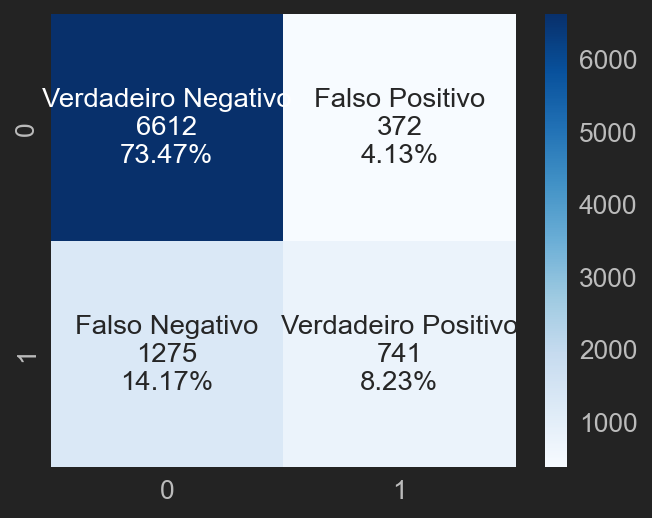

In [19]:
m1.matriz()

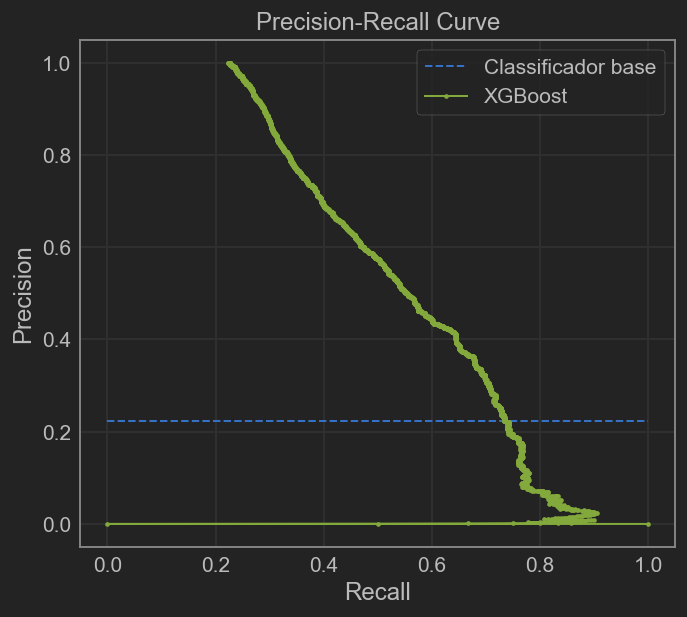

In [20]:
m1.precisionrecall()

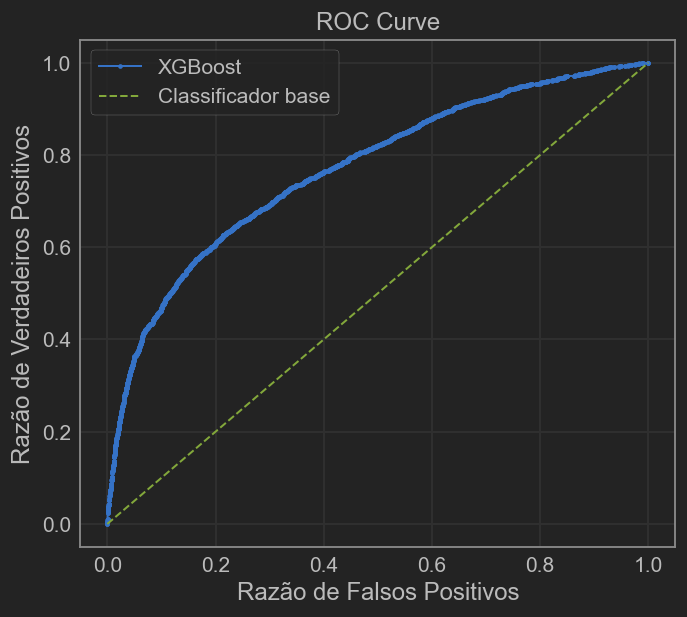

In [21]:
m1.roccurve()

## Tuning XGBoost

In [22]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [23]:
eval_metric = ["auc","error"]

In [24]:
xg2 = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [25]:
m2 = ml(X_train, X_test, y_train, y_test ,model = xg2, modelname = 'XGBoost_tuned')

[22:42:33] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:42:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
m2.auc()

0.79

In [27]:
m2.gini()

0.5800000000000001

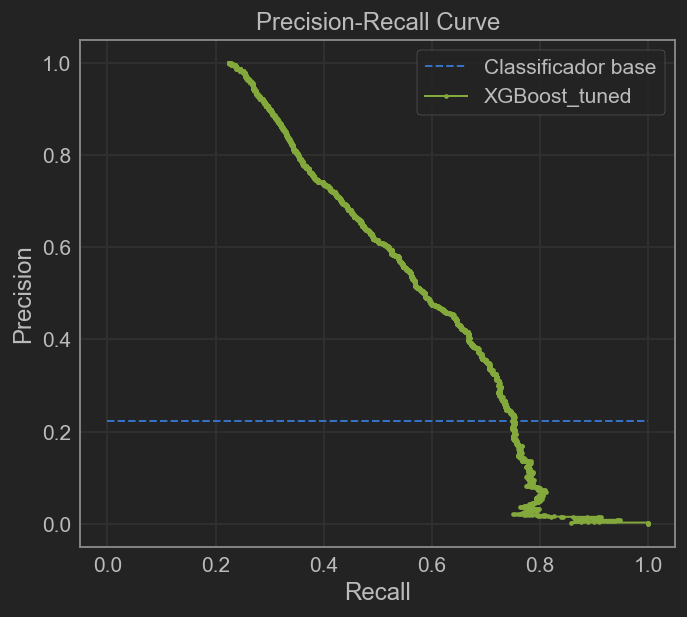

In [28]:
m2.precisionrecall()

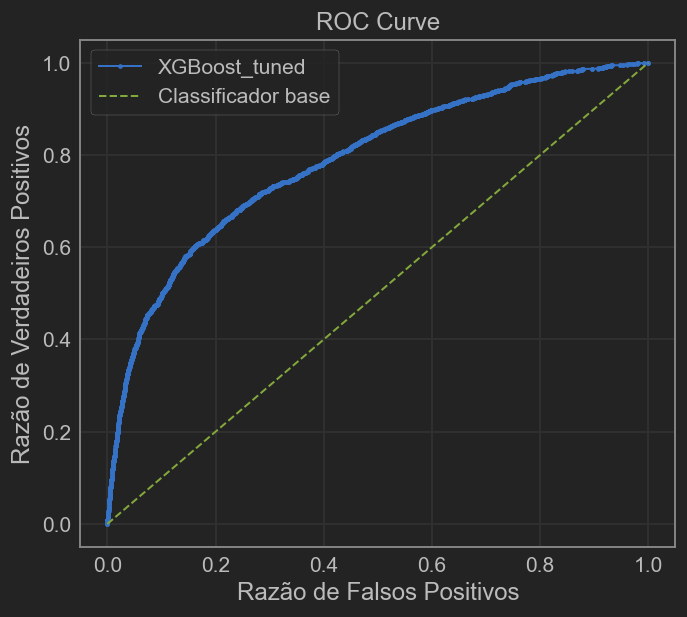

In [29]:
m2.roccurve()

In [30]:
m1.scores()
m2.scores()

,acuracia,precision,recall,f1,auc,gini
0,0.82,0.67,0.37,0.47,0.77,0.54


,acuracia,precision,recall,f1,auc,gini
0,0.82,0.7,0.35,0.47,0.79,0.58


# Implementar average precision

In [33]:
# Implementado lá na minha lib, portanto:
m1.avgprec()

0.55